In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import xgboost as xgb 
%matplotlib inline

In [2]:
ca_housing_dataset_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(ca_housing_dataset_url)
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Preparing the dataset

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2 we are going to use all columns of the dataset. Do the following to prepare the data:

* Keep only the records where ocean_proximity is either `'<1H OCEAN'` or `'INLAND'`.
* Fill missing values with zeros.
* Apply the log tranform to `median_house_value`.
* Do train / validation / test split with 60% / 20% / 20% distribution.
* Use the `train_test_split` function and set the random_state parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [5]:
df = df.loc[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.median_house_value = np.log1p(df.median_house_value)

In [6]:
X = df.drop('median_house_value', axis=1)
y = df.median_house_value

In [7]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=1)

In [8]:
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_cat_train = dv.fit_transform(train_dict)
feature_names = dv.get_feature_names_out()
X_cat_val = dv.transform(val_dict)
X_cat_test = dv.transform(test_dict)

### Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. Train a model with `max_depth=1`. Which feature is used for splitting the data?

* ocean_proximity
* total_rooms
* latitude
* population

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

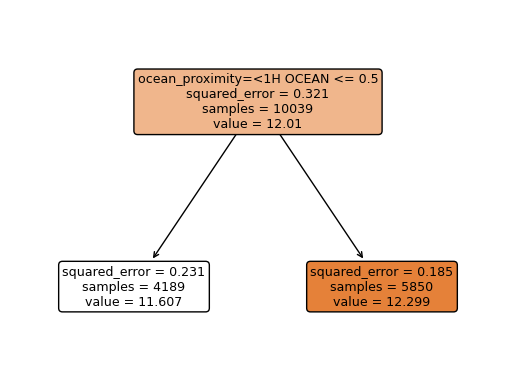

In [13]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_cat_train, y_train)
plot_tree(dt, filled=True, rounded=True, feature_names=feature_names);